## Introducción

La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí: https://datos.cdmx.gob.mx/explore

Esta base de datos contiene las Carpetas de investigación de delitos a nivel de calle de la Procuraduría General de Justicia de la Ciudad de México desde enero de 2016 hasta junio de 2019.[1]

A fin de responder las doce consultas del cuestionario, se hará previamente un análisis exploratorio de los datos recibidos, así como evaluar la consistencia de los datos y sus tipos.

### Análisis Exploratorio

Iniciaremos cargando las bibliotecas de funciones y los datos que fueron descargados en la carpeta de trabajo. Cada bloque de este notebook se complementará con comentarios para guiar al lector en el procedimiento utilizado.

In [1]:
# Step 0. Cargar bibliotecas y funciones ·······················#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1. Cargar los datos del archivo CSV ·····················#
dataset = pd.read_csv('carpetas-de-investigacion-pgj-cdmx.csv')

In [3]:
# Step 2. Realizar un análisis exploratorio de datos ···········#
# 2.1. Primero demos un vistazo de las cinco primeras observaciones del dataset
dataset.head(5)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


A primera vista se observan datos de ocurrencias de delitos con fecha, categoría, sector poblado, dirección y ubicación geográfica (latitud y longitud). Estos datos no disponen de un diccionario de datos que permita establecer de las dos fechas dadas "fecha_hechos" y "fecha inicio" se defina explicitamente de que se trata, así que se tomará como premisas que "fecha_hechos" es la fecha y hora aproximada declarada por el denunciante, y "fecha_inicio" es la fecha y hora del asentamiento de denuncia e inicio de investigación. 

Algo resaltante de esta vista es que hay observaciones que tienen algunas variables NaN, como colonia_hechos, latitud, longitud y geopint en el id 1. 

In [4]:
# 2.2. Veamos el tipo de datos del dataset ···········#
dataset.dtypes

id                        int64
ao_hechos               float64
mes_hechos               object
fecha_hechos             object
delito                   object
categoria_delito         object
fiscalia                 object
agencia                  object
unidad_investigacion     object
colonia_hechos           object
alcaldia_hechos          object
fecha_inicio             object
mes_inicio               object
ao_inicio                 int64
calle_hechos             object
calle_hechos2            object
longitud                float64
latitud                 float64
geopoint                 object
dtype: object

Se observa que fecha_hechos y fecha_inicios no son de tipo fecha y hora, por lo que se hará una conversión del mismo a un formato adecuado.

In [5]:
# 2.2.1 Convertir tipo de datos ················································#
dataset.fecha_hechos = dataset.fecha_hechos.astype('datetime64')
dataset.fecha_inicio = dataset.fecha_inicio.astype('datetime64')

In [6]:
# 2.3. Procedamos a dar un vistazo a las variables numéricas del dataset ·······#
dataset.describe(datetime_is_numeric=True)

,id,ao_hechos,fecha_hechos,fecha_inicio,ao_inicio,longitud,latitud
count,808871.000000,808673.000000,808673,808871,808871.000000,777536.000000,777536.000000
mean,404435.000000,2017.231278,2017-09-14 07:42:58.450869248,2017-11-08 18:40:05.927461120,2017.385776,-99.137481,19.388497
min,0.000000,1906.000000,1906-06-02 19:00:00,2016-01-01 01:35:06,2016.000000,-99.342765,9.486549
25%,202217.500000,2016.000000,2016-11-27 20:00:00,2017-01-09 19:49:20,2017.000000,-99.174906,19.342264
50%,404435.000000,2017.000000,2017-10-27 01:40:00,2017-11-27 13:51:10,2017.000000,-99.142680,19.391685
75%,606652.500000,2018.000000,2018-08-25 01:00:00,2018-09-19 15:52:30.500000,2018.000000,-99.101420,19.437588
max,808870.000000,2019.000000,2019-06-30 23:00:00,2019-06-30 23:56:29,2019.000000,-98.922660,19.611544
std,233501.089132,1.417107,NaN,NaN,1.020354,0.058754,0.069692


Luego de hacer una breve descripción del dataset, podemos observar que hay 808,871 observaciones. En las variables numéricas vemos que no todas están completas, por ejemplo ao_hechos solo cuenta con 808,673 valores, esto es el 99.97% del total de observaciones. En el caso de longitud y latitud sólo hay 777,536 valores respectivamente, esto es 96.1% del total de observaciones. 

In [7]:
dataset.sort_values(by = 'fecha_hechos').head(100)

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
720614,720614,1906.0,Junio,1906-06-02 19:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,EL MOLINO TEZONCO,IZTAPALAPA,2016-06-03 13:11:57,Junio,2016,CALLE ZACAHUIZCO LT 1603 MZ 155,CUAUHTEMOC,-99.068833,19.301730,"19.3017298308,-99.0688332896"
528673,528673,1915.0,Enero,1915-01-10 15:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-1,UI-3CD,BOSQUE RESIDENCIAL DEL SUR,XOCHIMILCO,2016-06-13 12:27:38,Junio,2016,PROLONGACIÓN DIVISIÓN DEL NORTE,ESQ. SAN LORENZO,-99.125219,19.282765,"19.2827651109,-99.1252193122"
720311,720311,1915.0,Septiembre,1915-09-10 10:00:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,INVESTIGACIÓN EN CUAUHTEMOC,URI-CUH-2,UI-1SD,CENTRO,CUAUHTEMOC,2016-05-02 16:47:06,Mayo,2016,AV. CHAPULTEPEC,AV. NIÑOS HEROES Y CALLE BALDERAS,-99.148935,19.427542,"19.4275419998,-99.148935"
256224,256224,1930.0,Febrero,1930-02-16 12:00:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-4,UI-3CD,AMPLIACIÓN GABRIEL HERNÁNDEZ,GUSTAVO A MADERO,2016-04-30 18:46:27,Abril,2016,RAFAEL RAMIREZ,NaN,-99.101358,19.504748,"19.5047479998,-99.101358"
247057,247057,1942.0,Octubre,1942-10-22 19:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-1,UI-1CD,PEDREGAL DE SANTO DOMINGO,COYOACAN,2016-05-23 00:44:38,Mayo,2016,JILOTZINGO,ILAMA,-99.170861,19.329233,"19.3292329998,-99.170861"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68764,68764,1987.0,Noviembre,1987-11-01 12:00:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,LA JOYA,XOCHIMILCO,2016-07-16 09:37:25,Julio,2016,LA JOYA,NaN,-99.096061,19.233471,"19.2334708998,-99.0960609"
414779,414779,1987.0,Diciembre,1987-12-11 11:00:00,USO DE DOCUMENTO FALSO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN DELITOS AMBIENTALES Y EN MATE...,DA-1,UI-2CD,CERRO DE LA ESTRELLA,IZTAPALAPA,2016-01-15 10:30:32,Enero,2016,LEBRIJA,NaN,-99.073637,19.322144,"19.3221439998,-99.073637"
258792,258792,1987.0,Diciembre,1987-12-12 17:50:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-3CD,LOMAS DE SAN ÁNGEL INN,ALVARO OBREGON,2017-12-12 18:36:56,Diciembre,2017,VERACRUZ,NaN,-99.205464,19.341536,"19.3415363663,-99.2054640053"
651797,651797,1987.0,Diciembre,1987-12-22 12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,URI-MH-5,UI-1SD,POLANCO,MIGUEL HIDALGO,2018-03-16 11:52:47,Marzo,2018,EJERCITO NACIONAL,ANATOLE FRANCE,-99.197028,19.438058,"19.4380583279,-99.1970281399"


### Cuestionario de preguntas

#### 1. ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.
La primera prueba sería consistencia de datos. Esta prueba se efectúa mediante una descripción de las variables, que contengan las medidas de descripción, tendencia central, desviación y percentiles. Por ejemplo en el análisis previo vemos que la variable "ao_hechos" tiene un valor mínimo de 1906, que corresponde al año de "fecha_hechos". El análisis permite crear un marco donde se corrijan o excluyan datos inconsistentes, teniendo cuidado con los outliers que pueden no necesariamente ser errores. [2]

#### 2. ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [8]:
# Imprimamos los datos de cantidad, mínimo y máximo de datos
print(f"En el dataset origina hay registrados {len(dataset)} delitos, a partir del \
{dataset['fecha_hechos'].min()} hasta el {dataset['fecha_hechos'].max()}") 

En el dataset origina hay registrados 808871 delitos, a partir del 1906-06-02 19:00:00 hasta el 2019-06-30 23:00:00


In [9]:
# Este rango puede estar errado, por lo que agregaremos una columna adicional con una modificación
dataset['fecha_hechos_mod'] = dataset['fecha_hechos'].mask(dataset['fecha_hechos'].dt.year < 2016, \
                                                           dataset['fecha_inicio'])

print(f"En el dataset corregido hay registrados {len(dataset)} delitos, a partir del \
{dataset['fecha_hechos_mod'].min()} hasta el {dataset['fecha_hechos_mod'].max()}") 

En el dataset corregido hay registrados 808871 delitos, a partir del 2016-01-01 00:00:00 hasta el 2019-06-30 23:22:07


Esta pregunta requiere un poco de criterio del analista, ya que el dataset original no es consistente respecto al año de registro contra el año del delito. Dado que hemos hecho la transformación, convertiremos la variable "fecha_hechos_mod" en el índice del dataset.

In [10]:
dataset.set_index('fecha_hechos_mod', inplace = True)

#### 3. ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [11]:
dataset_counts = dataset.groupby('alcaldia_hechos').size().reset_index(name='obs').sort_values(by = 'obs', \
                                                                              ascending = False)
dataset_counts['ratio_pct'] = 100 * dataset_counts['obs']/dataset_counts['obs'].sum()
dataset_counts.head(20)

,alcaldia_hechos,obs,ratio_pct
122,CUAUHTEMOC,131397,16.264823
196,IZTAPALAPA,119926,14.844899
164,GUSTAVO A MADERO,80097,9.914713
62,BENITO JUAREZ,70599,8.739014
117,COYOACAN,54235,6.713416
252,MIGUEL HIDALGO,53688,6.645706
25,ALVARO OBREGON,52568,6.507068
445,VENUSTIANO CARRANZA,46224,5.721783
416,TLALPAN,46179,5.716213
58,AZCAPOTZALCO,39435,4.881415


In [12]:
# Calculamos el ratio acumulado de las 10 alcaldías con más delitos
dataset_counts['ratio_pct'].head(10).sum()

85.94905057807047

En este caso colocamos un ranking por las 10 alcaldías con más delitos, que representan un 85.9% del total de delitos del periodo. Ahora pasaremos a mostrar los cinco delitos más frecuentes:

In [13]:
dataset_counts = dataset.groupby('delito').size().reset_index(name='obs').sort_values(by = 'obs', \
                                                                              ascending = False)
dataset_counts['ratio_pct'] = 100 * dataset_counts['obs']/dataset_counts['obs'].sum()
dataset_counts.head(5)

,delito,obs,ratio_pct
273,VIOLENCIA FAMILIAR,69517,8.594325
223,ROBO DE OBJETOS,52214,6.455170
159,ROBO A NEGOCIO SIN VIOLENCIA,51426,6.357750
75,FRAUDE,45349,5.606456
51,DENUNCIA DE HECHOS,44433,5.493212


In [14]:
# Calculamos el ratio acumulado de los 5 delitos más frecuentes
dataset_counts['ratio_pct'].head(5).sum()

32.50691395784989

Podemos observar el ranking por tipo de delito, los cuales representan el 32.5% del total de delitos del periodo.

#### 4. Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

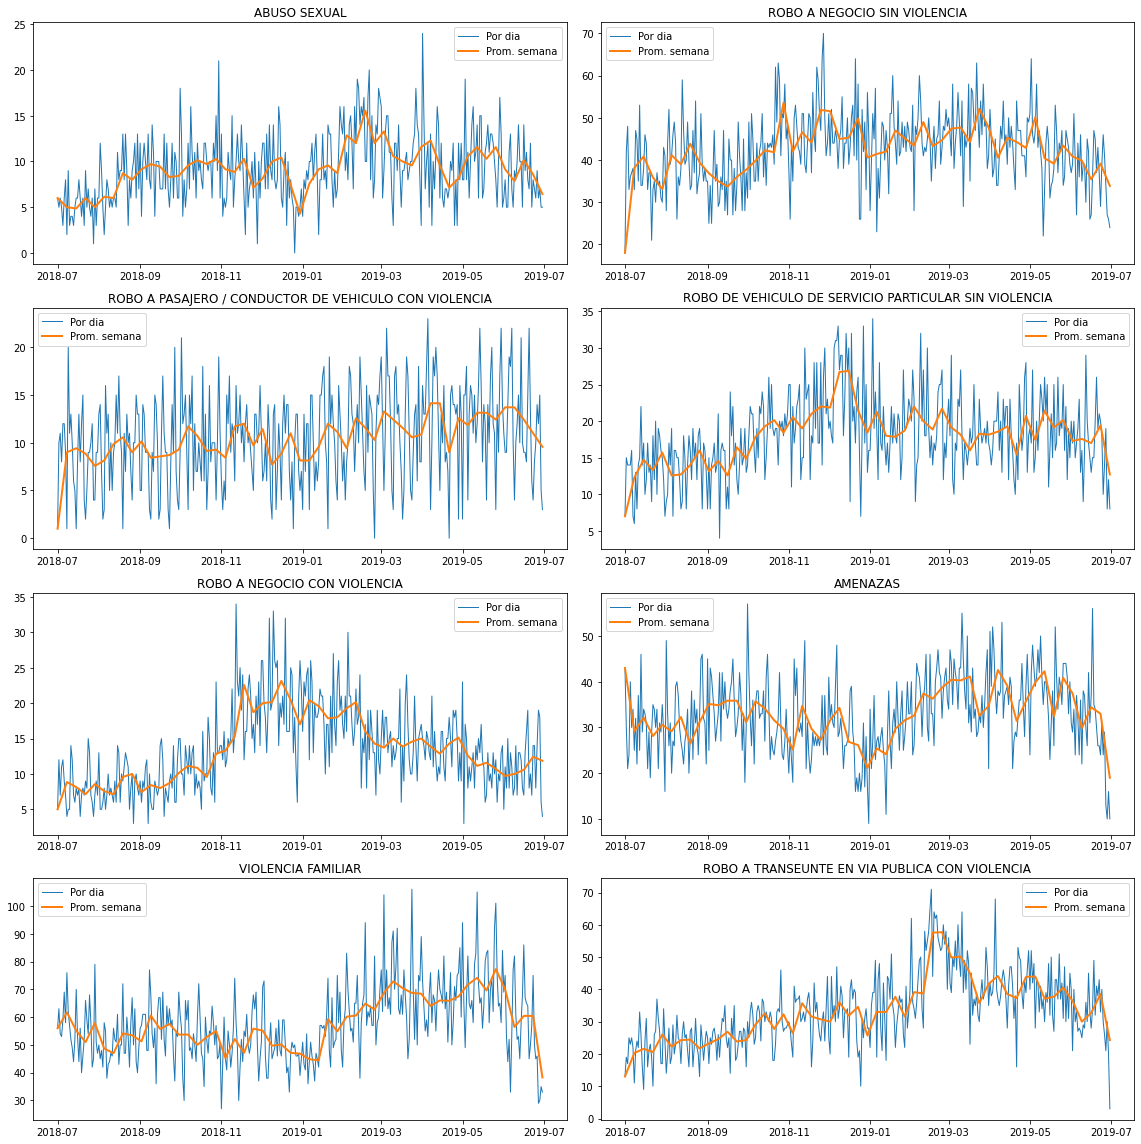

In [49]:
# Cuando indican delitos en el último año consideraremos los últimos 365 días, para construir una tabla pivote
dataset_counts = dataset[dataset.index >= '2018-07-01'][['delito']].\
pivot_table(index=['fecha_hechos_mod'],columns = ['delito'], values = ['delito'], aggfunc = len).\
fillna(0).resample('D', level=0).sum()

# A fin de evitar las pocas ocurrencias, busquemos el top 20 de delitos para graficar aquellos al alza
top_df= dataset_counts[dataset_counts.sum().nlargest(20).index]

# Ahora vamos calcular las pendientes con una regresión lineal y calcular si van a la baja o al alza
slopes = np.polyfit(x=(top_df.index - top_df.index.min()).days, y=top_df, deg=1)[0]
al_alza = top_df.iloc[:, np.argsort(slopes)[-8:]]

al_alza

# Ya calculados los delitos al alza, los ponemos en una gráfica
fig, axs = plt.subplots(4, 2, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    ax.plot(al_alza.iloc[:,i],linewidth=1,label='Por dia')
    ax.plot(al_alza.iloc[:,i].resample('W').mean(),linewidth=2,label='Prom. semana')
    ax.set_title(al_alza.columns[i])
    ax.legend()

fig.tight_layout()
plt.show()

#### 5. ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

#### 6. Dentro de cada alcaldía, cuáles son las tres colonias con más delitos?

#### 7. ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

#### 8. ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

#### 9. Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado). Pinta un mapa con este indicador. Describe los resultados.

#### 10. ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

#### 11. Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados). ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

#### 12. Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

### Referencias

[1] Gobierno de la Ciudad de México. (7 de mayo del 2021). *Carpetas de investigación PGJ de la Ciudad de México (archivo)*, descargado de https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-pgj-cdmx  
[2] El caso del Espectómetro de mapeo de ozono total (TOMS) ilustra el cuidado que se debe tomar con los outliers: Earth Observatory -Nasa. (7 de mayo del 2021). *Serendipity and Stratospheric Ozone*, descargado de https://earthobservatory.nasa.gov/features/RemoteSensingAtmosphere/remote_sensing5.php